In [1]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

# y=4x+3+random

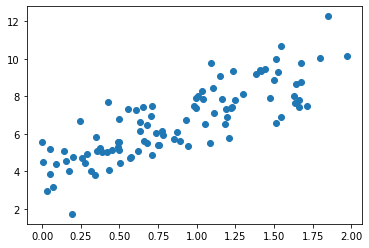

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [3]:
#정규방정식으로 예측
X_b = np.c_[np.ones((100,1)),X] #모든 샘플에 x0=1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.98123167]
 [3.07048243]]


In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0=1 추가
y_predict = X_new_b.dot(theta_best)

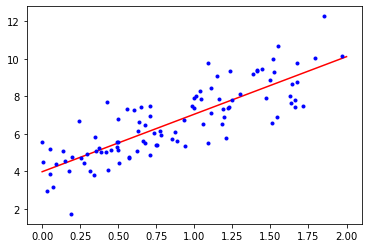

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')

사이킷런으로 LR을 수행하는 것은 간단하다.

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.98123167] [[3.07048243]]
[[ 3.98123167]
 [10.12219652]]


LinearRegression은 scipy.linalg.lstsq()를 기반으로 하므로 이 함수를 직접 호출할 수 있다.

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

[[3.98123167]
 [3.07048243]]


유사역행렬은 특이값분해(SVD)를 사용해 계산되는데 이는 정규방정식보다 효율적이고, 특이행렬이라서 정규방정식이 작동하지 않는 경우에도 유사역행렬은 구할 수 있다.
특성의 수의 제곱만큼 복잡도가 증가한다 O(N^2) 하지만 샘플의 수에 대해서는 선형적으로 증가한다 O(N)

경사 하강법은 비용함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 과정으로 θ를 임의값으로 정하고 비용함수(RMSE, MES)가 감소되는 방향으로 진행하여 최솟값(gradient=0)이 될 때까지 점진적으로 향상시킨다. 
스텝의 크기(learning rate)가 중요한 파라미터이다. lr이 크면 정밀도가 떨어지고 작으면 시간이 오래걸린다.

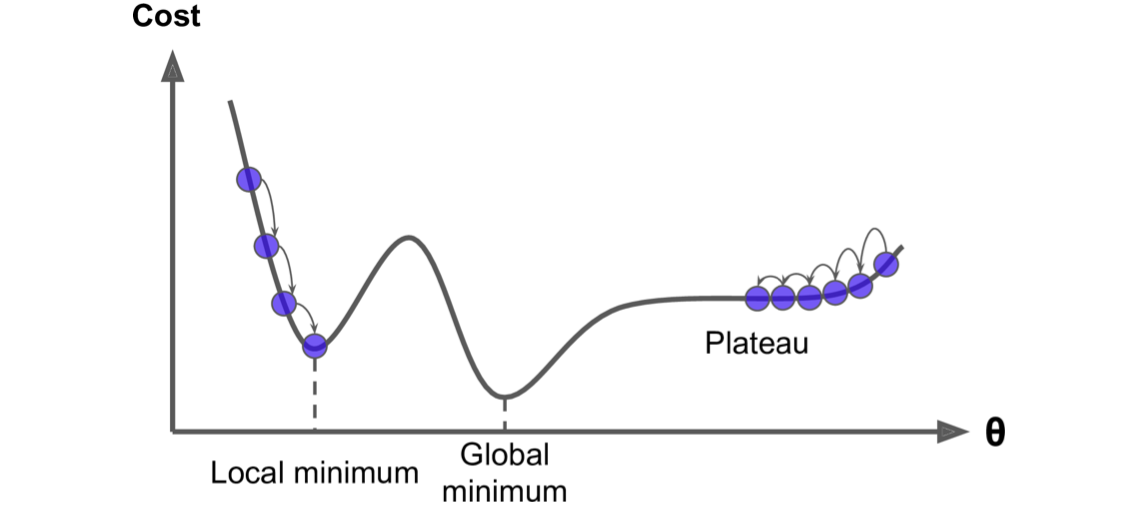
local minumum에 갖혀 global minimum에 도달하지 못하거나, 오른쪽의 평평한곳에 갖혀 시간이 지나 멈춰버려 global minimum에 도달하지 못할 수 있다.

다행히도 Linear Regression을 위한 MSE비용함수는 볼록함수이므로 하나의 최솟값만 갖는다.

<b>Gradient decent를 사용할때 모든 특성이 같은 스케일을 갖도록 하지 않으면(Standard Scaler사용) 시간이 오래 걸린다.</b>

In [8]:
eta = 0.1 #learning rate
n_iterations = 1000
m=100

theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

print(theta)

[[3.98123167]
 [3.07048243]]


In [9]:
lin_reg.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

모든 스텝에서 전체 훈련세트를 사용해 gradient를 계산해 느린 배치 경사 하강법의 단점을 확률적 경사 하강법(SGD)은 매 스탭에서 훈련세트 하나를 무작위로 선택하여 계산함으로서 보완한다.

다만, 무작위성은 local minumum에 갖히지 않게 해주지만 정확한 global mininum에 도달할 수 없게 하기 때문에 lr을 점진적으로 감소시켜 이를 해결한다. 매 반복에서 학습률을 결정하는 함수를 학습스케쥴이라고 한다.

In [10]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케쥴 하이퍼 파라미터

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[4.02560239]
 [3.12091364]]


In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
#최대1000에포크동안 실행, 손실이 0.001보
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

## 로지스틱 회귀
이진분류기로 50%가 넘으면 true, 아니면 false로 분류한다.

다음은 붓꽃 데이터셋을 활용한 분류기이다

In [14]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [25]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

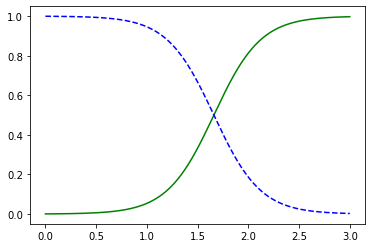

In [27]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-',label='Iris Virginica')
plt.plot(X_new, y_proba[:,0],'b--',label='Not Iris Virginica')

결정경계(decision boundary)가 1.6cm근방에서 만들어져서 꽃잎 너비가 1.6cm보다 크면 Iris-Verginica로 분류하고 그보다 작으면 아니라고 분류할 것이다.

In [30]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

사이킷런에서는 l2페널티를 기본으로 사용하여 규제하지만 l1페널티도 사용할 수 있다.
사이킷런의 Logistic Regressiondptj 모델의 규제 강도를 조절하는 하이퍼 파라미터는 alpha의 역수인 c이다. 따라서 C가 높을수록 모델의 규제가 줄어든다.

로지스틱 회귀모델을 여러개 훈련시켜 다중 클래스 분류를 지원하도록 한 것으로 소프트맥스 회귀 또는 다항 로지스틱 회귀라고 부른다.

다만 소프트맥스 회귀는 여러 클래스로 분류할 수 있는 것이지 한 사진안에 두 종류의 붓꽃이 있으면 사용할 수 없다.

사이킷런의 로지스틱 회귀는 기본적으로 클래스가 두개 이상일 때 OVA(1:다)를 사용하지만, multi_class 변수를 multinomial로 바꾸면 소프트맥스 회귀를 사용할 수 있다.(solver 매개변수에 lbfgs같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 함)

In [33]:
X = iris['data'][:,(2,3)] #꽃잎 길이, 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [34]:
softmax_reg.predict([[5,2]])

array([2])

In [35]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

연습문제
 수백만개의 특성을 가진 훈련세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?
    -SGD
 훈련 세트에 있는 특성들이 각기 아주 다른 스케일을 가지고 있을 때 잘 작동하지 않는 알고리즘은?
    -경사하강법(StandardScaler를 사용하여 전처리를 해준다)
  로지스틱회귀의 비용함수는 시그모이드 함수인데 이는 볼록함수이므로 경사하강법으로 훈련시킬 때 지역 최솟값에 갇히지 않는다.